In [19]:
import pandas as pd
import numpy as np
import pickle

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [20]:
def result_pred(pred, resY):
    print(f'mean_squared_error: {math.sqrt(mean_squared_error(resY, pred))}')
    print(f'mean_absolute_error: {mean_absolute_error(resY, pred)}')
    print(f'median_absolute_error: {median_absolute_error(resY, pred)}')
    print(f'r2_score: {r2_score(resY, pred)}')

In [21]:
data = pd.read_csv('TrainTestDATA.csv').iloc[:, 1:]

In [22]:
data

,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,fuelType,brand,notRepairedDamage
0,4450,limousine,2003,manual,150,150000,diesel,bmw,no
1,13299,suv,2005,manual,163,150000,diesel,volvo,no
2,3200,bus,2003,manual,101,150000,diesel,volkswagen,no
3,4500,small car,2006,manual,86,60000,petrol,seat,no
4,18750,suv,2008,automatic,185,150000,diesel,volvo,no
...,...,...,...,...,...,...,...,...,...
41770,790,limousine,1998,manual,82,150000,diesel,opel,no
41771,830,small car,1999,manual,60,125000,petrol,renault,no
41772,175000,coupe,1998,manual,286,50000,petrol,porsche,no
41773,2290,station wagon,2001,manual,101,150000,petrol,opel,no


## **Работа с категориальными признаками**

In [23]:
data = pd.get_dummies(data, columns=['vehicleType'])
data = pd.get_dummies(data, columns=['gearbox'])
data = pd.get_dummies(data, columns=['fuelType'])

data['brand'] = data['brand'].astype('category')
data['brand'] = data['brand'].cat.codes

data['notRepairedDamage'] = data['notRepairedDamage'].astype('category')
data['notRepairedDamage'] = data['notRepairedDamage'].cat.codes

for elem in data.iloc[:, :]:
    data[elem] = data[elem].map(int)

## **Посмотрим на получившиеся данные и построим матрицу корреляции**

In [24]:
data

,price,yearOfRegistration,powerPS,kilometer,brand,notRepairedDamage,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,...,vehicleType_station wagon,vehicleType_suv,gearbox_automatic,gearbox_manual,fuelType_cng,fuelType_diesel,fuelType_electro,fuelType_hybrid,fuelType_lpg,fuelType_petrol
0,4450,2003,150,150000,2,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
1,13299,2005,163,150000,38,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
2,3200,2003,101,150000,37,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,4500,2006,86,60000,30,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,18750,2008,185,150000,38,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41770,790,1998,82,150000,24,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
41771,830,1999,60,125000,27,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
41772,175000,1998,286,50000,26,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
41773,2290,2001,101,150000,24,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


<Axes: >

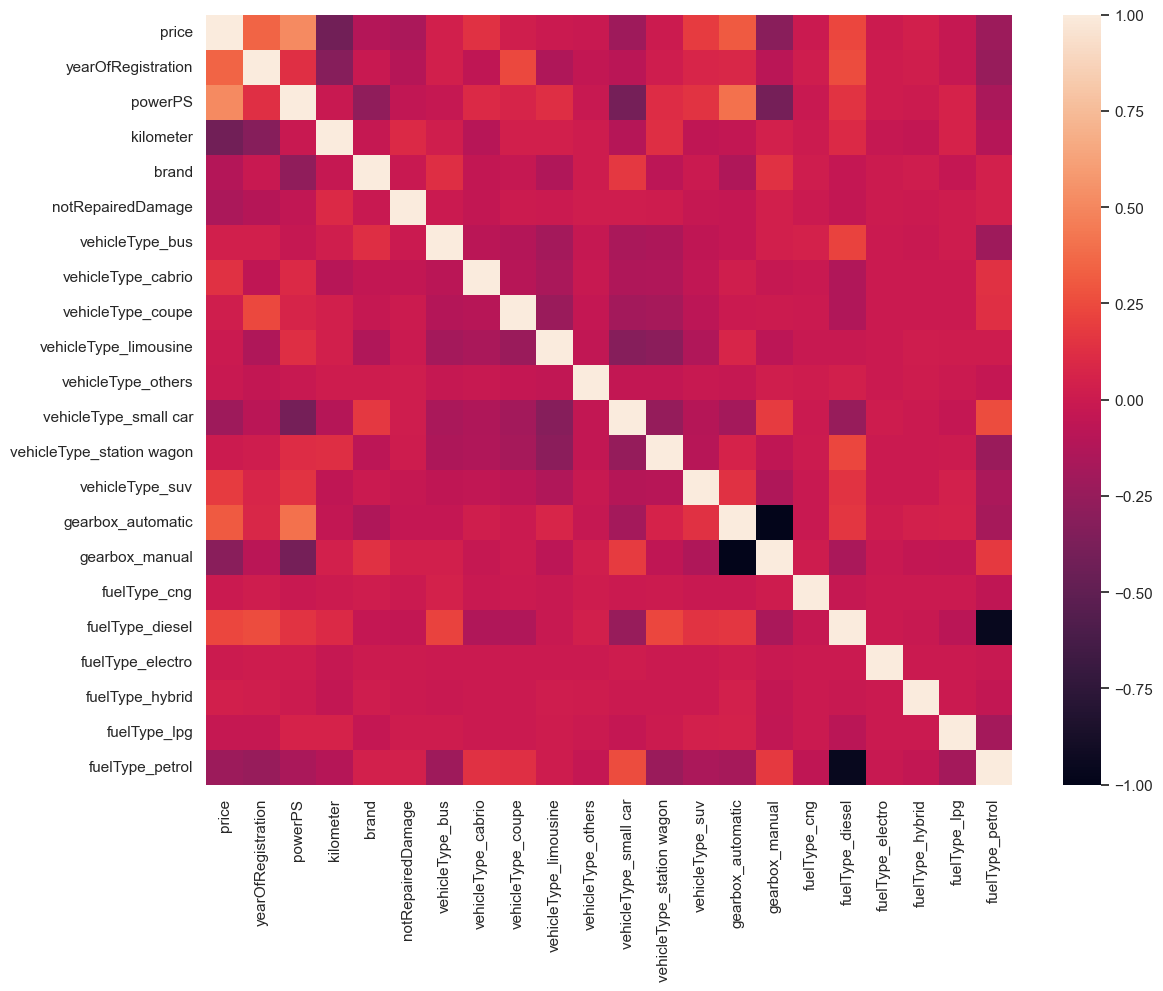

In [25]:
corr_matrix = data.corr()

sns.set(rc={'figure.figsize': (13, 10)})

sns.heatmap(corr_matrix, annot=False)

## **Разделим данные**

In [26]:
X = data.drop(columns=['price'])
Y = data['price']

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

## **Обучем и протестируем GradientBoostingRegressor**

In [28]:
GRB = GradientBoostingRegressor()

GRB.fit(X_train, Y_train)

prediction = GRB.predict(X_test)

In [29]:
result_pred(prediction, Y_test)

mean_squared_error: 2836.193053526936
mean_absolute_error: 1555.0352659857163
median_absolute_error: 905.7539676626022
r2_score: 0.8201762412778912


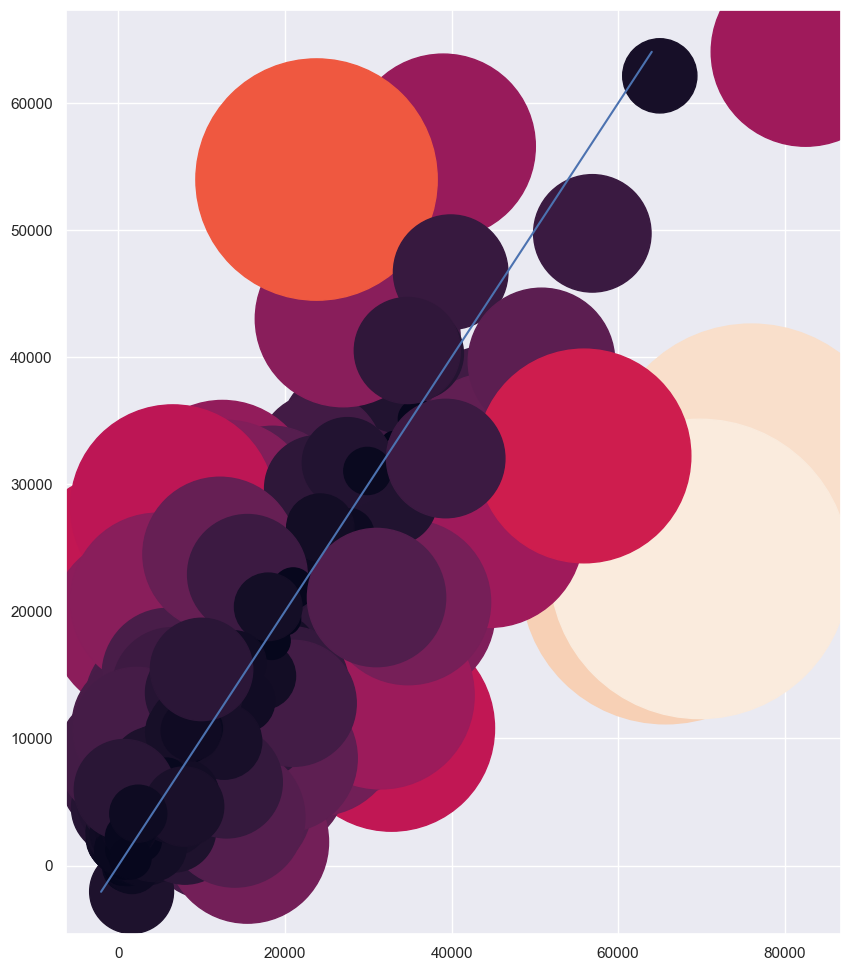

In [30]:
test_predictions = np.array(prediction)
area = abs(Y_test - test_predictions)
plt.figure(figsize=(10, 12))
plt.plot(
    np.arange(min(test_predictions) - 20, max(test_predictions) + 5),
    np.arange(min(test_predictions) - 20, max(test_predictions) + 5)
)
plt.scatter(Y_test, test_predictions, marker='o', s=area, c=area)

In [31]:
search_GRB = GradientBoostingRegressor(loss='absolute_error',
                                       learning_rate=0.5,
                                       n_estimators=500,
                                       max_depth=6,
                                       min_samples_split=150,
                                       min_samples_leaf=175,
                                       min_weight_fraction_leaf=0.01)

search_GRB.fit(X_train, Y_train)

prediction = search_GRB.predict(X_test)

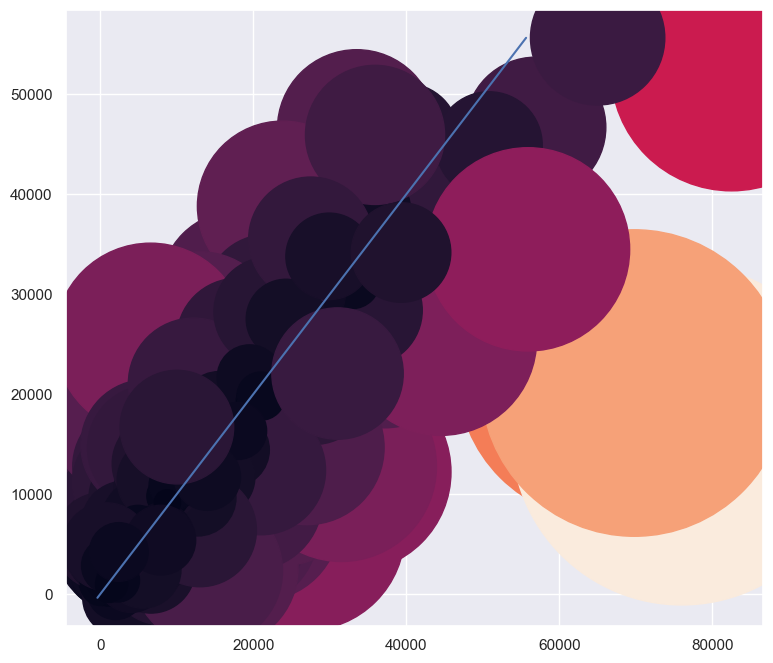

In [32]:
test_predictions = np.array(prediction)
area = abs(Y_test - test_predictions)
plt.figure(figsize=(9, 8))
plt.plot(
    np.arange(min(test_predictions) - 20, max(test_predictions) + 5),
    np.arange(min(test_predictions) - 20, max(test_predictions) + 5)
)
plt.scatter(Y_test, test_predictions, marker='o', s=area, c=area)

In [33]:
result_pred(prediction, Y_test)

mean_squared_error: 2678.878484220038
mean_absolute_error: 1300.7042104211896
median_absolute_error: 660.6107008544315
r2_score: 0.8395715005236977


## **Затестим на всех данных** 

In [34]:
search_GRB.fit(X, Y)

prediction = search_GRB.predict(X)

result_pred(prediction, Y)

mean_squared_error: 3643.159525223829
mean_absolute_error: 1296.1895300114138
median_absolute_error: 592.959460365807
r2_score: 0.7706702562502675


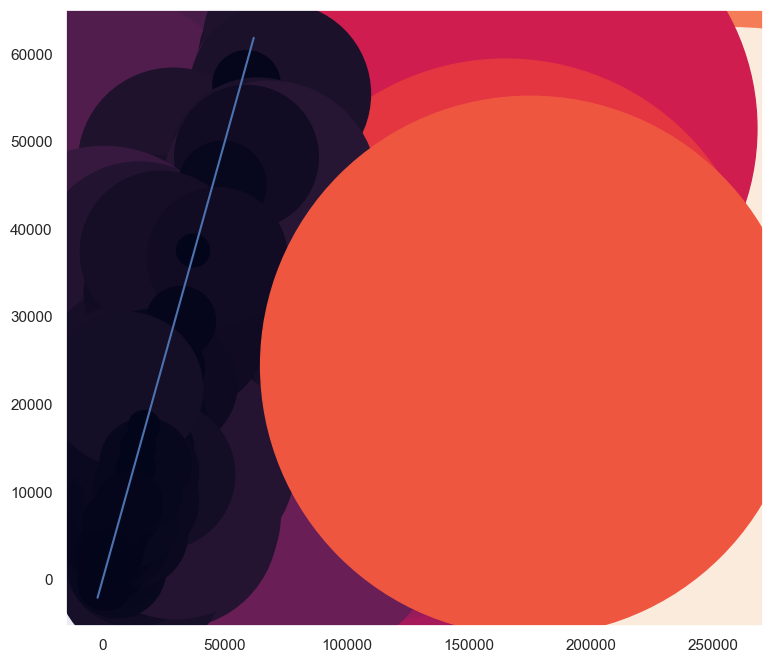

In [35]:
test_predictions = np.array(prediction)
area = abs(Y - test_predictions)
plt.figure(figsize=(9, 8))
plt.plot(
    np.arange(min(test_predictions) - 20, max(test_predictions) + 5),
    np.arange(min(test_predictions) - 20, max(test_predictions) + 5)
)
plt.scatter(Y, test_predictions, marker='o', s=area, c=area)

# **Эта модель нам точно не подайдёт для предсказаний продолжим работать с предыдущей соделью**